# 시각화 도구로 기술통계만으로 알기 힘들었던 패턴과 이상한 점 찾아내기
## 히스토그램 : 연속변수의 분포 조사
- 단일 변수가 어떻게 분포하는지 이해
- 연속변수(x축), 출현빈도(y축)
- 중심경향, 왜도(대칭성), 과잉첨도(상대적으로 두꺼운 꼬리), 확산(spread) 등 분포 형태에 대한 그림을 제공
    - 통계적 검정에서 분포에 대한 가정을 하는 경우가 많으므로 중요함!

## 데이터 : 기상관측소별 지표온도(2019년)

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
landtemps = pd.read_csv('data/landtemps2019avgs.csv')
covidtotals = pd.read_csv('data/covidtotals_ch5.csv', parse_dates = ['lastdate'])
covidtotals.set_index('iso_code', inplace = True)

In [3]:
landtemps.columns

Index(['locationid', 'station', 'countryid', 'country', 'latabs', 'elevation',
       'avgtemp'],
      dtype='object')

In [4]:
landtemps[['station', 'country', 'latabs', 'elevation','avgtemp']].sample(10, random_state = 1)

,station,country,latabs,elevation,avgtemp
10526,NEW_FORK_LAKE,United States,43.1167,2542.0,1.864167
1416,NEIR_AGDM,Canada,51.3667,1145.0,2.185000
2230,CURICO,Chile,34.9670,225.0,15.504167
6002,LIFTON_PUMPING_STN,United States,42.1231,1809.0,4.385833
2106,HUAILAI,China,40.4170,538.0,11.020833
2090,MUDANJIANG,China,44.5670,242.0,5.816667
7781,CHEYENNE_6SW_MESONET,United States,35.5461,694.0,14.875833
10502,SHARKSTOOTH,United States,37.5000,3267.5,4.105833
11049,CHALLIS_AP,United States,44.5228,1534.1,6.510000
2820,METHONI,Greece,36.8331,52.0,18.200000


In [5]:
#기술통계
landtemps.describe()

,latabs,elevation,avgtemp
count,12095.000000,12095.000000,12095.000000
mean,40.466791,589.330211,11.193542
std,12.611377,761.973468,8.563443
min,0.017000,-350.000000,-60.821000
25%,34.510300,78.000000,5.417917
50%,40.670300,271.300000,10.450000
75%,46.750550,817.500000,16.919583
max,90.000000,9999.000000,33.930000


In [6]:
#왜도
landtemps.avgtemp.skew()

-0.26783825834817704

In [7]:
#첨도
landtemps.avgtemp.kurtosis()

2.1698313707061074

### 1. 평균 기온의 히스토그램

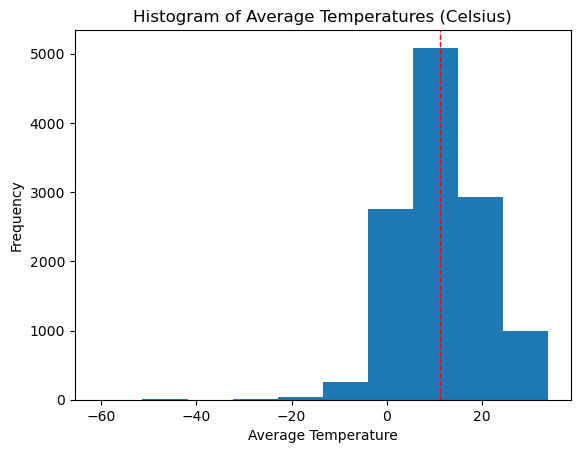

In [8]:
plt.hist(landtemps.avgtemp)
plt.axvline(landtemps.avgtemp.mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
plt.title('Histogram of Average Temperatures (Celsius)')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

### 2. 분위수-분위수 그림(QQ Plot)
- 어디에서 정규분포를 벗어나는지 확인
- 기온이 대체로 빨간 선을 따라 분포(완벽한 정규분포라면 모든 점이 빨간 선에 가까울 것, 하지만 여기서는 꼬리쪽으로 갈수록 멀어짐)

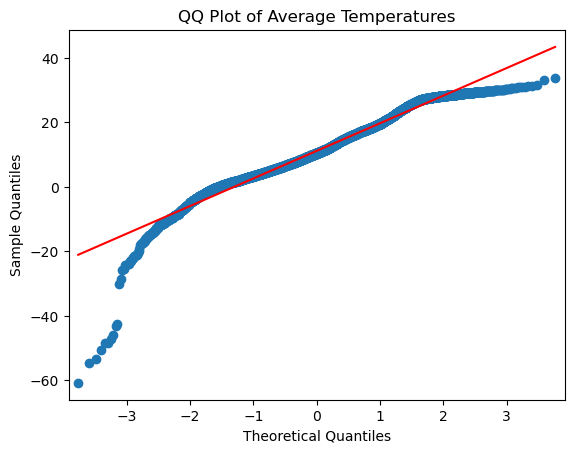

In [9]:
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']), line = 's')
plt.title('QQ Plot of Average Temperatures')
plt.show()

## 데이터 : 국가별 백만 명당 코로나19 확진자 수

### 1. 왜도와 첨도
- 정규 분포의 왜도는 0이며, 데이터가 정규 분포에 가까울수록 왜도는 0에 가까워짐
- 보통 왜도가 -1에서 1 사이의 값이면 비교적 정상적인 데이터 분포로 간주
---
- 첨도는 데이터 분포의 뾰족함을 나타내는 지표로, 정규 분포의 첨도는 3
- 첨도가 3보다 작으면 (음수일수록) 데이터 분포는 정규 분포보다 더 납작하고 플랫
- 첨도가 3보다 크면 데이터 분포는 뾰족하며 꼬리가 두꺼운 분포로 간주

In [10]:
covidtotals.total_cases_pm.skew()

4.284484653881833

In [11]:
covidtotals.total_cases_pm.kurtosis()

26.137524276840452

### 2. 히스토그램(**Stacked Histogram)
- 4개 지역(오세아니아/호주, 동아시아, 아프리카 나뭅, 서유럽)
    - 참고 : 범주가 너무 많으면 스택 다이어그램이 지저분해짐
- 각 지역 내 국가들의 total_cases_pm의 시리즈를 반환하는 함수 정의 >> 시리즈를 스택 히스토그램에 적용
- 결과 : 분포 대부분에서 백만 명당 확진자 수가 2,000미만임

In [12]:
showregions = ['Oceania / Aus', 'East Aisa', 'Southern Africa', 'Western Europe']

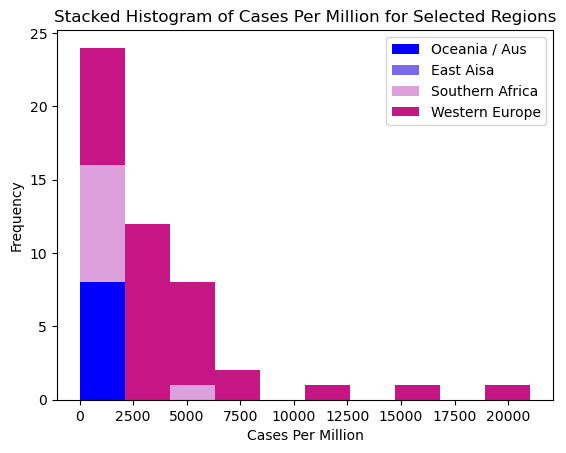

In [21]:
def getcases(regiondesc):
    return covidtotals.loc[covidtotals.region == regiondesc, 'total_cases_pm']

plt.hist([getcases(k) for k in showregions], color = ['blue', 'mediumslateblue', 'plum', 'mediumvioletred'], label = showregions, stacked = True)
plt.title('Stacked Histogram of Cases Per Million for Selected Regions')
plt.xlabel('Cases Per Million')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 22500, step=2500))
plt.legend()
plt.show()